In [1]:
# Install Kaggle
!pip install kaggle


In [2]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

Download Dataset

In [3]:
!kaggle datasets download -d gti-upm/leapgestrecog

Dataset URL: https://www.kaggle.com/datasets/gti-upm/leapgestrecog
License(s): CC-BY-NC-SA-4.0
 99% 2.11G/2.13G [00:27<00:00, 23.0MB/s]
100% 2.13G/2.13G [00:27<00:00, 84.2MB/s]


Unzip

In [4]:
!unzip leapgestrecog.zip

Streaming output truncated to the last 5000 lines.
  inflating: leapgestrecog/leapGestRecog/07/06_index/frame_07_06_0001.png  
  inflating: leapgestrecog/leapGestRecog/07/06_index/frame_07_06_0002.png  
  inflating: leapgestrecog/leapGestRecog/07/06_index/frame_07_06_0003.png  
  inflating: leapgestrecog/leapGestRecog/07/06_index/frame_07_06_0004.png  
  inflating: leapgestrecog/leapGestRecog/07/06_index/frame_07_06_0005.png  
  inflating: leapgestrecog/leapGestRecog/07/06_index/frame_07_06_0006.png  
  inflating: leapgestrecog/leapGestRecog/07/06_index/frame_07_06_0007.png  
  inflating: leapgestrecog/leapGestRecog/07/06_index/frame_07_06_0008.png  
  inflating: leapgestrecog/leapGestRecog/07/06_index/frame_07_06_0009.png  
  inflating: leapgestrecog/leapGestRecog/07/06_index/frame_07_06_0010.png  
  inflating: leapgestrecog/leapGestRecog/07/06_index/frame_07_06_0011.png  
  inflating: leapgestrecog/leapGestRecog/07/06_index/frame_07_06_0012.png  
  inflating: leapgestrecog/leapGestRe

Import Libraries

In [5]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout


Load and Preprocess Dataset

In [6]:
DATA_PATH = "leapGestRecog"
IMG_SIZE = 64

images = []
labels = []
gesture_names = []

for user in os.listdir(DATA_PATH):
    user_path = os.path.join(DATA_PATH, user)

    for gesture in os.listdir(user_path):
        gesture_path = os.path.join(user_path, gesture)

        if gesture not in gesture_names:
            gesture_names.append(gesture)

        label = gesture_names.index(gesture)

        for img in os.listdir(gesture_path):
            img_path = os.path.join(gesture_path, img)

            image = cv2.imread(img_path)
            image = cv2.resize(image, (IMG_SIZE, IMG_SIZE))

            images.append(image)
            labels.append(label)

images = np.array(images)
labels = np.array(labels)

# Normalize
images = images / 255.0

# One-hot encode labels
labels = to_categorical(labels)

print("Total Images:", images.shape)
print("Total Classes:", len(gesture_names))


Total Images: (20000, 64, 64, 3)
Total Classes: 10


Train-Test Split

In [7]:
X_train, X_test, y_train, y_test = train_test_split(
    images, labels, test_size=0.2, random_state=42
)

Build CNN Model

In [8]:
model = Sequential()

model.add(Conv2D(32, (3,3), activation='relu', input_shape=(64,64,3)))
model.add(MaxPooling2D(2,2))

model.add(Conv2D(64, (3,3), activation='relu'))
model.add(MaxPooling2D(2,2))

model.add(Conv2D(128, (3,3), activation='relu'))
model.add(MaxPooling2D(2,2))

model.add(Flatten())

model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(len(gesture_names), activation='softmax'))

model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

model.summary()

/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 62, 62, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 31, 31, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 29, 29, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 14, 14, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 12, 12, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 6, 6, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 4608)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │       589,952 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 684,490 (2.61 MB)

 Trainable params: 684,490 (2.61 MB)

 Non-trainable params: 0 (0.00 B)

Train Model

In [9]:
history = model.fit(
    X_train, y_train,
    epochs=10,
    batch_size=32,
    validation_data=(X_test, y_test)
)

Epoch 1/10
500/500 ━━━━━━━━━━━━━━━━━━━━ 120s 236ms/step - accuracy: 0.6863 - loss: 0.8968 - val_accuracy: 0.9983 - val_loss: 0.0062
Epoch 2/10
500/500 ━━━━━━━━━━━━━━━━━━━━ 139s 232ms/step - accuracy: 0.9845 - loss: 0.0501 - val_accuracy: 0.9987 - val_loss: 0.0024
Epoch 3/10
500/500 ━━━━━━━━━━━━━━━━━━━━ 142s 231ms/step - accuracy: 0.9916 - loss: 0.0272 - val_accuracy: 0.9998 - val_loss: 0.0015
Epoch 4/10
500/500 ━━━━━━━━━━━━━━━━━━━━ 142s 232ms/step - accuracy: 0.9962 - loss: 0.0118 - val_accuracy: 0.9980 - val_loss: 0.0071
Epoch 5/10
500/500 ━━━━━━━━━━━━━━━━━━━━ 115s 230ms/step - accuracy: 0.9959 - loss: 0.0127 - val_accuracy: 0.9990 - val_loss: 0.0016
Epoch 6/10
500/500 ━━━━━━━━━━━━━━━━━━━━ 119s 239ms/step - accuracy: 0.9942 - loss: 0.0189 - val_accuracy: 0.9992 - val_loss: 9.6434e-04
Epoch 7/10
500/500 ━━━━━━━━━━━━━━━━━━━━ 144s 242ms/step - accuracy: 0.9963 - loss: 0.0151 - val_accuracy: 0.9948 - val_loss: 0.0231
Epoch 8/10
500/500 ━━━━━━━━━━━━━━━━━━━━ 116s 232ms/step - accuracy: 0.99

Evaluate Model

In [10]:
loss, accuracy = model.evaluate(X_test, y_test)
print("Test Accuracy:", accuracy)


125/125 ━━━━━━━━━━━━━━━━━━━━ 8s 59ms/step - accuracy: 1.0000 - loss: 3.6133e-05
Test Accuracy: 1.0


Plot Accuracy Graph

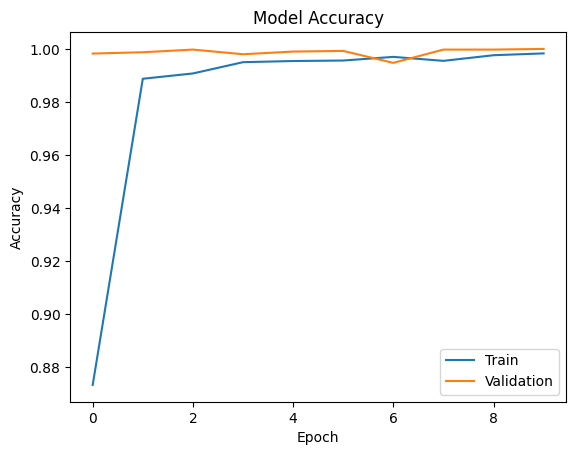

In [11]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title("Model Accuracy")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend(['Train', 'Validation'])
plt.show()

Save Model

In [12]:
model.save("gesture_model.h5")

Download it

In [13]:
from google.colab import files
files.download("gesture_model.h5")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>